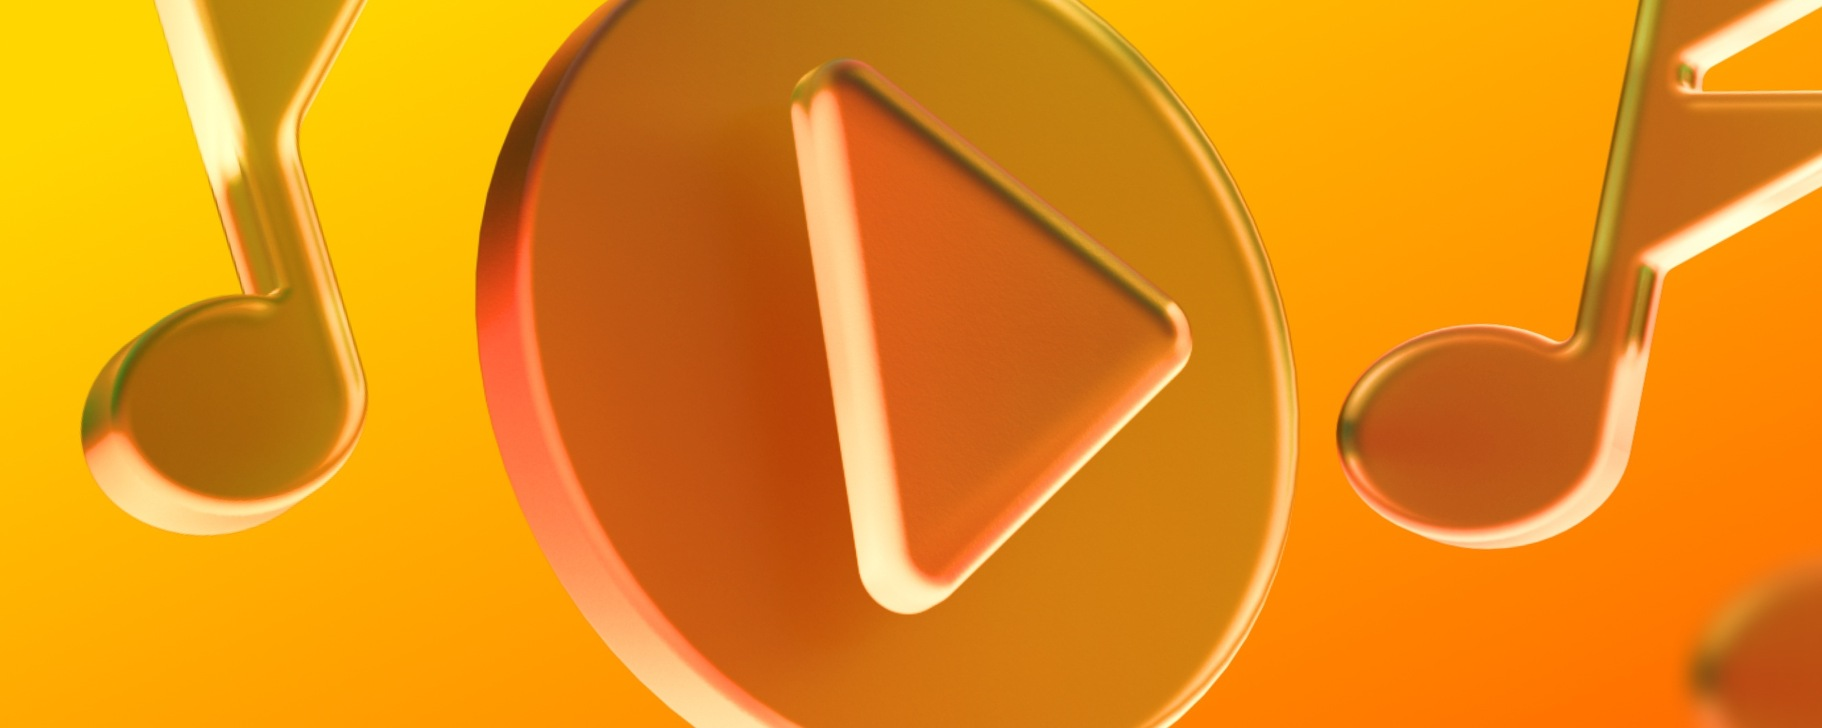

# Исследование данных сервиса “Яндекс.Музыка” — сравнение пользователей двух городов

<hr style="background-color: #FF772A; color: #FF772A; height: 3px;"> 

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

<hr style="background-color: #FF772A; color: #FF772A; height: 3px;"> 

In [1]:
# импорт библиотеки pandas
import pandas as pd

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv(r'C:\Users\79859\Documents\GitHub\datasets\yandex_music_project.csv')

In [3]:
# получение первых 10 строк таблицы df
df.head(10)

,Unnamed: 0,userID,Track,artist,genre,City,time,Day
0,0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  65079 non-null  int64 
 1     userID    65079 non-null  object
 2   Track       63848 non-null  object
 3   artist      57876 non-null  object
 4   genre       63881 non-null  object
 5     City      65079 non-null  object
 6   time        65079 non-null  object
 7   Day         65079 non-null  object
dtypes: int64(1), object(7)
memory usage: 4.0+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

<hr style="background-color: #FF772A; color: #FF772A; height: 3px;"> 

In [5]:
# перечень названий столбцов таблицы df
df.columns

Index(['Unnamed: 0', '  userID', 'Track', 'artist', 'genre', '  City  ',
       'time', 'Day'],
      dtype='object')

In [6]:
# переименование столбцов
df = df.rename(columns={'  userID' : 'user_id',
                       'Track' : 'track',
                       '  City  ' : 'city',
                       'Day' : 'day'}) 

In [7]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['Unnamed: 0', 'user_id', 'track', 'artist', 'genre', 'city', 'time',
       'day'],
      dtype='object')

### Пропуски значений

In [8]:
# подсчёт пропусков
df.isna().sum()

Unnamed: 0       0
user_id          0
track         1231
artist        7203
genre         1198
city             0
time             0
day              0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для вашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в проекте. Придётся:
* заполнить и эти пропуски явными обозначениями;
* оценить, насколько они повредят расчётам. 

In [9]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']
for columns in columns_to_replace:
    df[columns] = df[columns].fillna('unknown')

In [10]:
# подсчёт пропусков
df.isna().sum()

Unnamed: 0    0
user_id       0
track         0
artist        0
genre         0
city          0
time          0
day           0
dtype: int64

### Дубликаты

In [11]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

In [12]:
# удаление явных дубликатов
df = df.drop_duplicates()

In [13]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

In [14]:
# Просмотр уникальных названий жанров
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

In [15]:
# Устранение неявных дубликатов
df['genre'] = df['genre'].replace(['hip', 'hop','hip-hop'], 'hiphop')

In [16]:
# Проверка на неявные дубликаты
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

<hr style="background-color: #FF772A; color: #FF772A; height: 3px;"> 

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Поэтому проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга.
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.

In [17]:
# Подсчёт прослушиваний в каждом городе
df.groupby('city')['city'].count()

city
Moscow              45360
Saint-Petersburg    19719
Name: city, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

In [18]:
# Подсчёт прослушиваний в каждый из трёх дней
df.groupby('day')['day'].count()

day
Friday       23149
Monday       22697
Wednesday    19233
Name: day, dtype: int64

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

In [19]:
# Функция возвращает число - значение track_list_count.
def number_tracks(day, city):
    track_list = df[df['day'] == day]
    track_list = track_list[track_list['city'] == city]
    track_list_count = track_list['user_id'].count()
    return track_list_count

In [20]:
# количество прослушиваний в Москве по понедельникам
number_tracks('Monday', 'Moscow')

16715

In [21]:
# количество прослушиваний в Санкт-Петербурге по понедельникам
number_tracks('Monday', 'Saint-Petersburg')

5982

In [22]:
# количество прослушиваний в Москве по средам
number_tracks('Wednesday', 'Moscow')

11755

In [23]:
# количество прослушиваний в Санкт-Петербурге по средам
number_tracks('Wednesday', 'Saint-Petersburg')

7478

In [24]:
# количество прослушиваний в Москве по пятницам
number_tracks('Friday', 'Moscow')

16890

In [25]:
# количество прослушиваний в Москве по пятницам
number_tracks('Friday', 'Moscow')

16890

In [26]:
# Таблица с результатами
columns = ['city', 'monday', 'wednesday', 'friday']
data = [['Moscow', 15740, 11056, 15945],
       ['Saint-Petersburg', 5614, 7003, 5895]]
pd.DataFrame(data=data, columns=columns)

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

In [27]:
# получение таблицы moscow_general
moscow_general = df[df['city'] == 'Moscow']

In [28]:
# получение таблицы spb_general
spb_general = df[df['city'] == 'Saint-Petersburg']

In [29]:
def genre_weekday(df, day, time1, time2):
    # последовательная фильтрация
    # оставляем в genre_df только те строки df, у которых день равен day
    genre_df = df[df['day'] == day] # оставляем в genre_df только те строки genre_df, у которых время меньше time2
    genre_df = genre_df[genre_df['time'] < time2] # оставляем в genre_df только те строки genre_df, у которых время больше time1
    genre_df = genre_df[genre_df['time'] > time1] # сгруппируем отфильтрованный датафрейм по столбцу с названиями жанров, возьмём столбец genre и посчитаем кол-во строк для каждого жанра методом count()
    genre_df_grouped = genre_df.groupby('genre')['genre'].count() # отсортируем результат по убыванию (чтобы в начале Series оказались самые популярные жанры)
    genre_df_sorted = genre_df_grouped.sort_values(ascending=False)# вернём Series с 10 самыми популярными жанрами в указанный отрезок времени заданного дня
    return genre_df_sorted[:10]

In [30]:
# вызов функции для утра понедельника в Москве 
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre
pop            830
dance          589
rock           511
electronic     501
hiphop         311
ruspop         203
world          190
rusrap         188
alternative    175
unknown        172
Name: genre, dtype: int64

In [31]:
# вызов функции для утра понедельника в Петербурге 
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

genre
pop            238
dance          192
rock           173
electronic     154
hiphop          88
ruspop          68
alternative     65
rusrap          56
jazz            47
classical       42
Name: genre, dtype: int64

In [32]:
# вызов функции для вечера пятницы в Москве
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

genre
pop            761
rock           546
dance          521
electronic     510
hiphop         282
world          220
ruspop         184
alternative    176
classical      171
rusrap         151
Name: genre, dtype: int64

In [33]:
# вызов функции для вечера пятницы в Петербурге
genre_weekday(spb_general, 'Friday', '17:00', '23:00')

genre
pop            279
rock           230
electronic     227
dance          221
hiphop         103
alternative     67
jazz            66
rusrap          66
classical       64
world           60
Name: genre, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [34]:
#Сортировка для Москвы и группировка по жанрам
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False) 

In [35]:
# просмотр первых 10 строк moscow_genres
moscow_genres.head(10)

genre
pop            6253
dance          4707
rock           4188
electronic     4010
hiphop         2215
classical      1712
world          1516
alternative    1466
ruspop         1453
rusrap         1239
Name: genre, dtype: int64

In [36]:
#Сортировка для СБП и группировка по жанрам
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False) 

In [37]:
# просмотр первых 10 строк spb_genres
spb_genres.head(10)

genre
pop            2597
dance          2054
rock           2004
electronic     1842
hiphop         1020
alternative     700
classical       684
rusrap          604
ruspop          565
world           553
Name: genre, dtype: int64

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

<hr style="background-color: #FF772A; color: #FF772A; height: 3px;"> 

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 
С методами проверок гипотез вы ещё познакомитесь в следующих темах.